# Lab 5 - self practice

## Objectives 
- understand how to compute covariance matrix from data
- and how to compute eigen-vectors and eigen-values

### Generating data ###

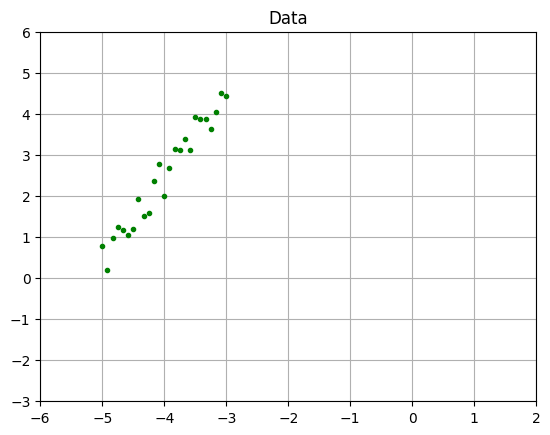

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Center data

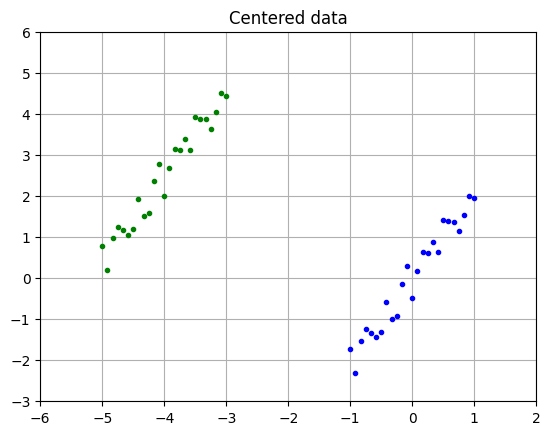

In [2]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
# write 2 lines below
mean_vector = data.mean(axis=0)
data_centered = data - mean_vector

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Covariance matrix

In [10]:
# calculate covariance matrix for our centered data

cov_mat = np.cov(data_centered, rowvar=False)
print('Covariance matrix:\n', cov_mat)

# Cov(x, y) = (1 / (n - 1)) * Sum_i(x_i * y_i)
# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = np.array([[data_centered[:, i] * data_centered[:, j] for j in range(2)] for i in range(2)]).sum(axis=2)/ (data.shape[0]-1)
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]
cov(X,Y): [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]


### Eigenvectors and eigenvalues

In [11]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = np.linalg.eig(cov_mat) # your code here
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)


# are they already in the needed order?
# if not, order eigenvectors and eigenvalues by eigenvalues, descending

idxs = [1,0] # your code here
eig_values = eig_values[idxs]
eig_vectors = eig_vectors[:, idxs]

print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values/eig_values.sum() # your code here
print('\nretained variance:',   retained_var)

eig_values: [0.01535567 2.01099716]
eig_vectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorteed eig_values: [2.01099716 0.01535567]
sorted eig_vectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

retained variance: [0.99242201 0.00757799]


### Project data ###

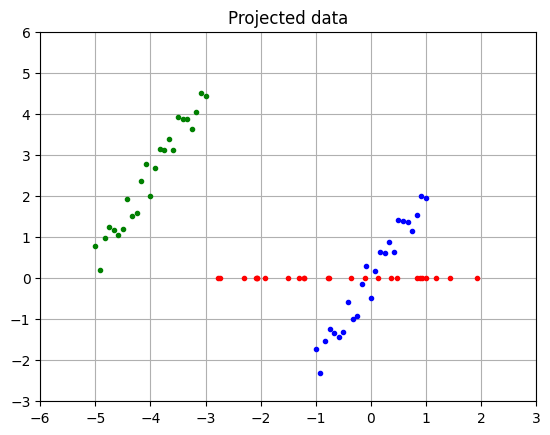

In [12]:
# project data to the first principal component
first_pc = eig_vectors[:, :1]
projected_data = data.dot(first_pc) # your code here

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

### Restore data back ###

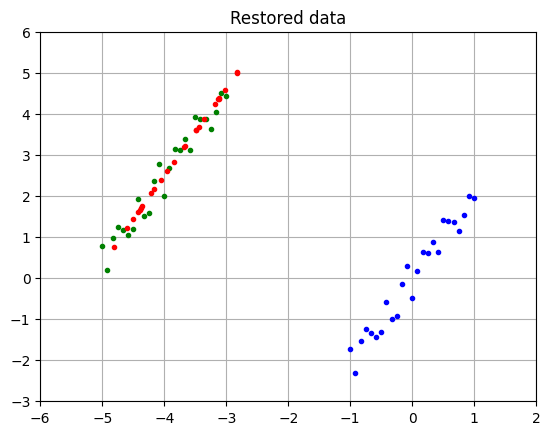

In [13]:
# Projected_data . first_pc.T + means
# project data back to initial space
# remember to add a mean_vector to the restored data

restored_data = np.dot(projected_data,first_pc.T) + mean_vector # your code here

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()